In [1]:
import pandas as pd
import numpy as np
#import io
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import shutil
# in google colab we need to upload files first
# then there is no need to put whole path of file
from google.colab import files
uploaded = files.upload()
matplotlib.rcParams["figure.figsize"] = (20,10)



Saving BHP.csv to BHP.csv


In [2]:
df1 = pd.read_csv("BHP.csv")
df1.head()
#it loads the data frame
# head() fxn gives the first 4 values of the dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape
#it shows number of (rows,columns) in the dataset

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')
#examine are type faeture...here we get the count of the area_type feature
#groupby the dataframe by area_type and then aggregate the count

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#assume availability society is not important in determining the price
#so we can drop those columns and copy the data into new dataframe..say: df2
df2 = df1.drop(['area_type','society','balcony', 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


1. DATA CLEANING
data cleaning process starts with handling the NA values i.e. NULL values
for that 'isnull()' function is used on the dataframe

In [6]:
df2.isnull().sum()
#.sum() function given the number of rows where particular column values as null


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

in above shown example, there are total 73 rows where the value pf bathroom is not available
so this might lead to problems in the accuracy. to avoid that we can do 2 possible things:
1-> drop the null values
2-> take median of the all the available values and subsitute that in the null places
we have to take decision wisely
as in above exmaple we can see that the row values are in 1000s and the number of na values are just 73 so its safe to drop those!


In [7]:
df3=df2.dropna()
df3.isnull().sum() # for rechecking the na values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
# now we may next explore the size column 
#some show 4 bhk and others 3 bedroom... so this needs fixation
#from panda series we get the unique() function which gives the unique col values
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# since bhk and bedroom are same, so we may create a new dataframe the 
# and then we can use apply function
# take any string and tokenize it for that we may use python lambda function
# for example in 2 bhk, 2 is taken as the token
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()
# x will contain the column values for each of the rows on which some transformation is to be applied
# to split the string using ,say, space we may use slpit fucniton and put the value via which splitting needs to be dome


<ipython-input-10-5a5db811914b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


now total_sqft seems to be with some errors as you cant have 43 bedrooms in 2400 sqft area.
so here also data cleaning is required, for which we may need to explore the total_sqft column

In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

in above o/p some values are in range instead of values
so to convert those to int values we cna take average of the 2 numbers
first, we need to check what are the variations in the feature, for that, we can check if the values are float or not

In [14]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)
#above fxn might have given just true or false value
# the negate fxn gives the row values

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


the o/p in above dataframe is not uniform as , say, in total_sqft, at some rows range is given and in others its just sqm unit given,
so this needs cleaning

In [16]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2

  try:
    return float(x)
  except:
    return None


In [17]:
convert_sqft_to_num('2230-2245')

2237.5

In [18]:
convert_sqft_to_num('4125Perch')

In [19]:
#create new dataframe
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df4.loc[39]

location      Uttarahalli
size                2 BHK
total_sqft         1143.0
bath                  2.0
price                45.0
bhk                     2
Name: 39, dtype: object

FEATURE ENGINEERING AND DIMENSIONALITY REDUCTION


In [21]:
df5 = df4.copy()
#create price_per_sqft feature
# this feature help in outlier cleaning
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
#explore location col
#check how many locs and how many rows avail in dataset for loc

len(df5.location.unique())

1304

In [23]:
#strip extra spaces from loc so that data is clean
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats <= 10])

1052

In [25]:
len(location_stats)

1293

In [26]:
location_stats_lessthan_10= location_stats[location_stats <= 10]
location_stats_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
#all the above locations can be put in another category
len(df5.location.unique())

1293

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x )
# with the above code all the locations will be converted into other 
len(df5.location.unique())

242

OUTLIER DETECTION AND REMOVAL
outliers are the data points which are data errors or rep extreme variation in dtaset
so it makes sense to remove them else they create problems
so we use:
1-> standard deviation
2-> domain knowledge
for example in real estate, when there are 2bhk it cant be 500sqft area in total
so we need to find a threshold and check for values less than that
say, typically for 1 bedroom, there maybe 300sqft area for 
using this critera we will find the rpoblema and solve


In [29]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


the above data is the anomalies or the outliers which need to be removed

In [30]:
df5.shape

(13246, 7)

In [31]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

another outlier-> price_per_sqft
its either very high or very low

In [32]:
df6.price_per_sqft.describe()
# decribe() method gives you some basic statistics of the feature


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

since we are making a generic model so we need to remove the end cases i.e. MIN and MAX

In [33]:
# we have to do removal as per location
# some locations may have higher price and some may have lower
# in that case we find mean and SD and filter data points that are beyond 1 SD
def remove_pps_outliers(df):# DataFrame is taken as input
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'): # grouped them by loaction and per loc we get subdf fro which mean and sd is calculated
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))] # filtering
    df_out = pd.concat([df_out, reduced_df], ignore_index=True) # reduced_df are appended per loc
  return df_out # gives output df

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

DATA VISUALIZATION-> we need to check the property price for 3 bhk is greater than or less than 2bhk.....this can be due to many resons like the location, the area, the society......so will visualise the data here using scatter plot

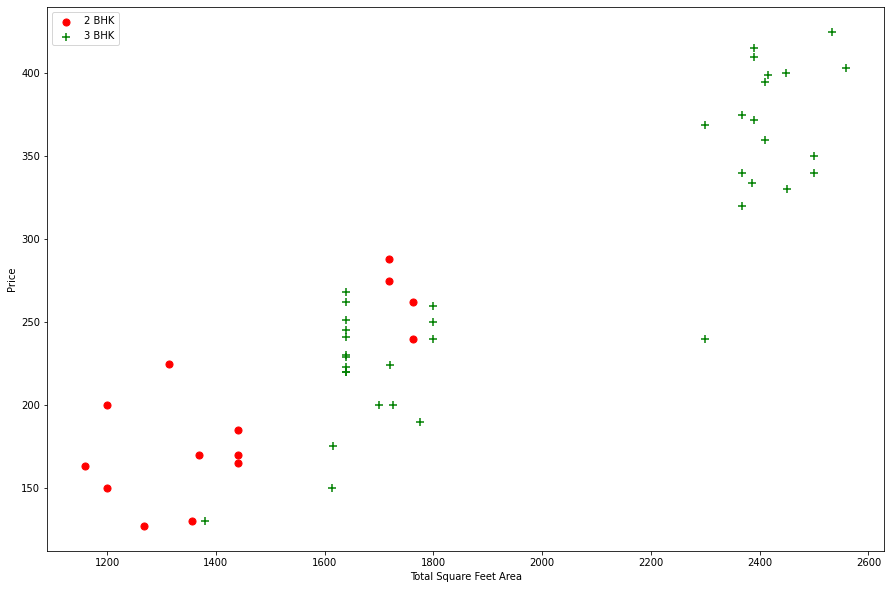

In [34]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk == 2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price, color='red', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, marker ='+', color='green', label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")


another outlier-> from above plot it can be seen that along 1700sqft there are 4 plots, 2 2bhk and 2 3bhk, where 2bhk plots have higher price than 3bhk plots......so this needs fixation

In [35]:
# the below fxn create some statistics
# we will create a dictionary,like, for 1bhk, 2bhk...
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'): #gourping
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'): # again grouping and creating new dataframe based on bhk
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'): # runnig fro loop again and excluding values
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

#now we can remove those 2bhk apartments whose pps is less than mean pps of 1bhk appartemnt

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

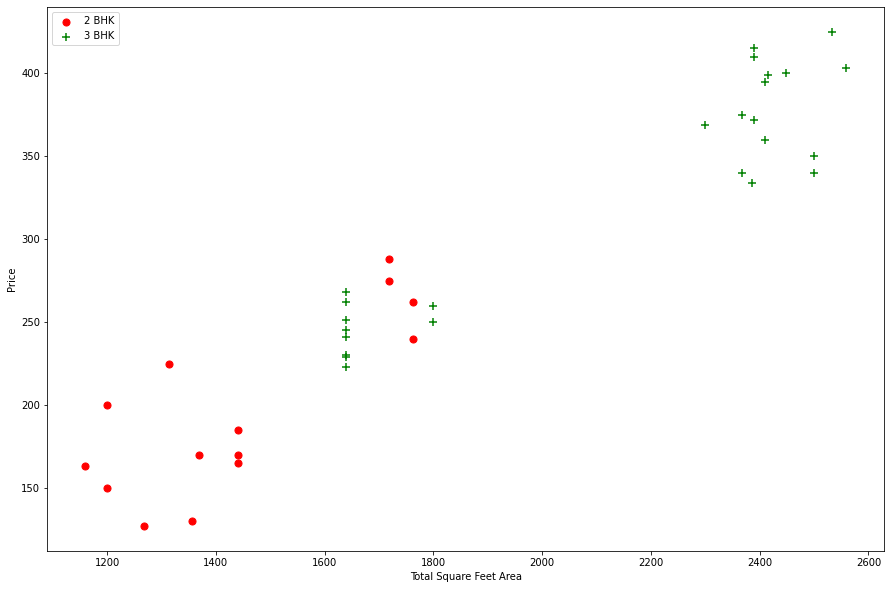

In [36]:
plot_scatter_chart(df8, "Rajaji Nagar" )

Text(0, 0.5, 'count')

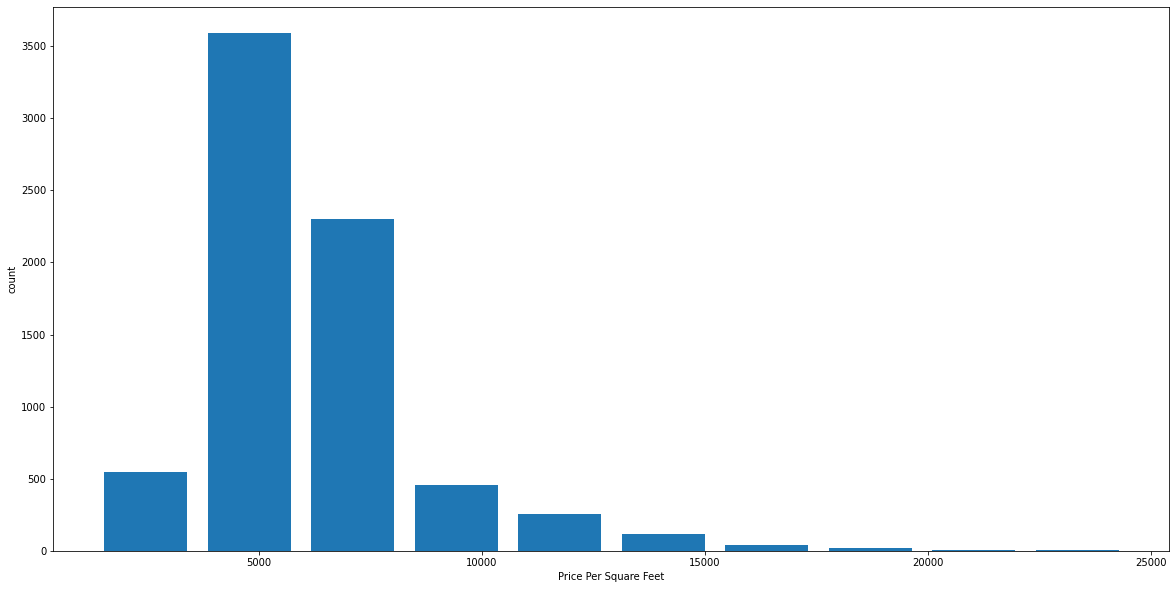

In [37]:
# HISTOGRAM
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")

Exploring the bathroom feature and removing the outlier


In [38]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [39]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

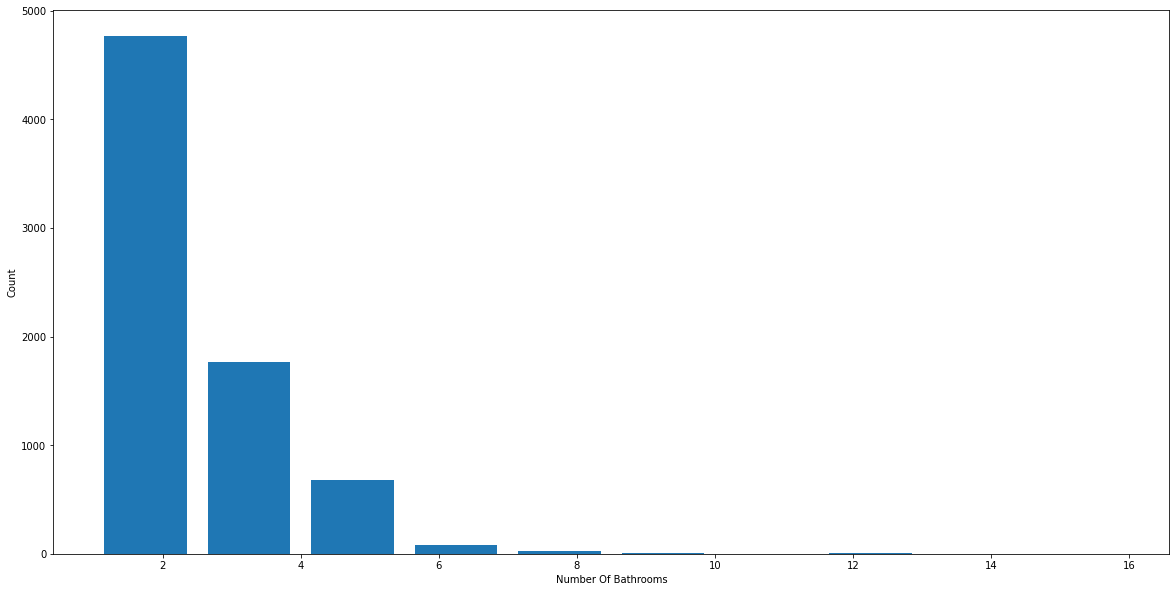

In [40]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number Of Bathrooms")
plt.ylabel("Count")

most properties have 2 bathrooms...and there are very fewer ouliers ,say, 12 bathrooms

In [41]:
df8[df8.bath > df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


above apartments needs to be removed

In [42]:
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7251, 7)

Text(0, 0.5, 'Count')

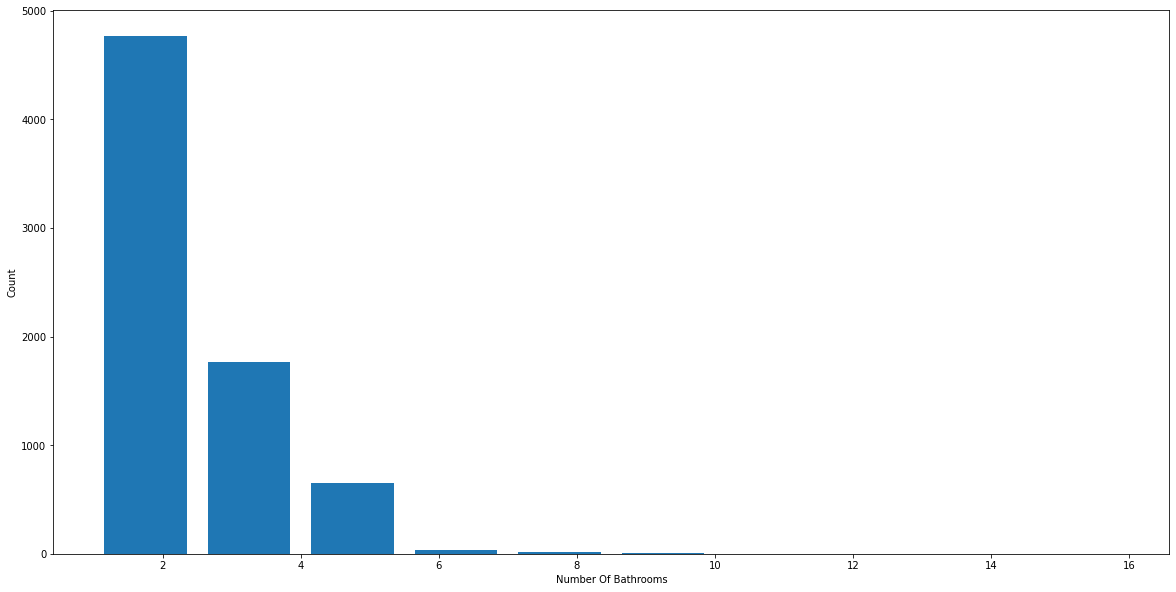

In [43]:
plt.hist(df9.bath, rwidth=0.8)
plt.xlabel("Number Of Bathrooms")
plt.ylabel("Count")

In [44]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


MODEL BUILDING: build ml mode and use k-fold cross-validation and grid cv to come up wth best algo and parameters

In [45]:
# pandas dummies method: for each of the locations it will create a new colunm
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11 = pd.concat([df10,dummies.drop('other', axis='columns')],axis='columns')
# to avoid dummy variable trap you should have one less dummy column
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df12.shape

(7251, 245)

In [49]:
X = df12.drop('price', axis='columns') # x is all independent variables
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [51]:
# import train test split method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) 
# test size 0.2 means there are 20% samples to be tests and remaining for model training

In [52]:
# here a linear reg model is created
# IT TELLS THE ACCURACY OF THE MODEL
# we are going to call fit method on x trained in y
# and once the model is trrained the next step is to evaluate score of our model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874383

In [53]:
# k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)
# shuffle split will randomize the samples so that each of the fold have equal dist of data samples

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [54]:
# # GRID SEARCH CV
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# def find_best_model_using_gridsearchcv(X,y):
#   algos= {
#       'linear_regression':{
#           'model': LinearRegression(),
#           'params':{
#               'normalise':[True, False]
#           }
#       },
#       'lasso':{
#           'model': Lasso(),
#           'params':{
              
#               'alpha':[1,2],
#               'selection':['random','cyclic']
#           }
#       },
#       'decision_tree':{
#           'model':DecisionTreeRegressor(),
#           'params':{
              
#               'criterion':['mse','friedman_mse'],
#               'splitter':['best','random']
#           }
#       }

#   }
#   scores = []
#   cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
#   for algo_name, config in algos.items():
#     gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score = False)
#     gs.fit(X,y)
#     scores.append({
#         'model' : algo_name,
#         'best_score':gs.best_score_,
#         'best_params':gs.best_params_
#     })
#   return pd.DataFrame(scores, columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(X,y)

In [55]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

3

properpty price prediction

In [56]:
def predict_price(location, sqft,bath,bhk):
  loc_index = np.where(X.columns==location)[0][0] #will give col index
  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index >= 0:
    x[loc_index] = 1

  return lr_clf.predict([x])[0]

In [57]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677207954

In [58]:
import pickle
with open('banglore_home_price_prediction_model','wb') as f:
  pickle.dump(lr_clf,f)

In [59]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))